In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.manifold import TSNE

In [2]:
# Read in the cutout images of the 114 weld seams (in the right order!), transform them to greyscale (to reduce the dimension from 3D to 2D) and append them to a list
image_list = []

# Create a list to store the number of cutouts for each folder/weld seam
cutouts_count_list = []

# Set the path of the dataset
path = '../data/hx_training_classify'

# Get the list of folder names and sort them numerically
folder_names = sorted(os.listdir(path), key=lambda x: int(x))

# Iterate over the sorted folder names
for folder_name in folder_names:
    folder_path = os.path.join(path, folder_name)
    print("folder_path:", folder_path)

    # Check if the item in the parent directory is a folder
    if os.path.isdir(folder_path):
        cutouts_folder = os.path.join(folder_path, "cutouts")

        # Get the list of image filenames and sort them based on X and Y values
        image_filenames = sorted(os.listdir(cutouts_folder), key=lambda x: (int(x.split('-')[1]), int(x.split('-')[2].split('.')[0])))

        # Append the count of images in the folder to the image_count_list
        cutouts_count_list.append(len(image_filenames))

        # Iterate over the sorted image filenames
        for filename in image_filenames:
            file_path = os.path.join(cutouts_folder, filename)
            print("file_path:", file_path)

            # Check if the item is a file
            if os.path.isfile(file_path):
                # Open and process the image using PIL
                try:
                    img = Image.open(file_path).convert('L')
                    image_list.append(img)
                except Exception as e:
                    print(f"Error processing image {file_path}: {str(e)}")

folder_path: ../data/hx_training_classify\1
file_path: ../data/hx_training_classify\1\cutouts\region-1-0.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-1-1.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-1-2.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-1-3.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-0.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-1.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-2.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-3.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-4.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-5.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-6.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-7.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-8.JPG
file_path: ../data/hx_training_classify\1\cutouts\region-2-9.JPG
file_path: ../data/hx_training_classify\1\cuto

In [3]:
# Convert the images in the list to a numpy array which contains the flattened pixel values of the images
raw_data_list = []
stacked_data_array = np.zeros((0, 30000))

for entry in image_list:
    entry = np.asarray(entry)
    raw_data_list.append(entry)
    entry = entry.flatten()
    entry = entry.reshape(1, -1)
    stacked_data_array = np.vstack((stacked_data_array, entry))

print(stacked_data_array.shape)

(8460, 30000)


In [69]:
# Creating an embedding which reduces the dimensionality of the data using t-SNE for every image in the array
embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, early_exaggeration=12).fit_transform(stacked_data_array)

In [70]:
# Just to make sure that the list contains the right amount of cutouts for each weld seam
print("length cutouts_count_list:", len(cutouts_count_list))
print("cutouts_count_list:", cutouts_count_list)

length cutouts_count_list: 114
cutouts_count_list: [68, 64, 62, 44, 52, 52, 58, 84, 58, 64, 64, 50, 54, 58, 66, 52, 68, 68, 62, 70, 66, 70, 68, 60, 68, 62, 48, 58, 54, 58, 58, 48, 58, 58, 44, 42, 58, 58, 48, 48, 64, 52, 52, 62, 56, 54, 50, 58, 58, 54, 84, 78, 100, 94, 102, 106, 100, 88, 102, 98, 104, 100, 98, 96, 86, 96, 80, 62, 70, 68, 68, 66, 62, 70, 76, 66, 60, 58, 64, 62, 74, 60, 104, 100, 96, 102, 106, 92, 108, 104, 94, 86, 90, 96, 84, 92, 84, 84, 82, 96, 80, 92, 92, 90, 86, 102, 100, 90, 88, 90, 88, 94, 84, 76]


In [71]:
# Create lists to arrange the cutouts into the 7 parameter classes
cutouts_list_class_1 = cutouts_count_list[:16]
cutouts_list_class_empty = cutouts_count_list[16:18]
cutouts_list_class_2 = cutouts_count_list[18:34]
cutouts_list_class_3 = cutouts_count_list[34:50]
cutouts_list_class_4 = cutouts_count_list[50:66]
cutouts_list_class_5 = cutouts_count_list[66:82]
cutouts_list_class_6 = cutouts_count_list[82:98]
cutouts_list_class_7 = cutouts_count_list[98:114]

cutouts_index_upper_bound_class_1 = sum(cutouts_list_class_1)
cutouts_index_upper_bound_class_empty = cutouts_index_upper_bound_class_1 + sum(cutouts_list_class_empty)
cutouts_index_upper_bound_class_2 = cutouts_index_upper_bound_class_empty + sum(cutouts_list_class_2)
cutouts_index_upper_bound_class_3 = cutouts_index_upper_bound_class_2 + sum(cutouts_list_class_3)
cutouts_index_upper_bound_class_4 = cutouts_index_upper_bound_class_3 + sum(cutouts_list_class_4)
cutouts_index_upper_bound_class_5 = cutouts_index_upper_bound_class_4 + sum(cutouts_list_class_5)
cutouts_index_upper_bound_class_6 = cutouts_index_upper_bound_class_5 + sum(cutouts_list_class_6)
cutouts_index_upper_bound_class_7 = cutouts_index_upper_bound_class_6 + sum(cutouts_list_class_7)

print("cutouts_list_class_1:", cutouts_list_class_1)
print("cutouts_list_class_empty:", cutouts_list_class_empty)
print("cutouts_list_class_2:", cutouts_list_class_2)
print("cutouts_list_class_3:", cutouts_list_class_3)
print("cutouts_list_class_4:", cutouts_list_class_4)
print("cutouts_list_class_5:", cutouts_list_class_5)
print("cutouts_list_class_6:", cutouts_list_class_6)
print("cutouts_list_class_7:", cutouts_list_class_7)

print("cutouts_index_upper_bound_class_1:", cutouts_index_upper_bound_class_1)
print("cutouts_index_upper_bound_class_empty:", cutouts_index_upper_bound_class_empty)
print("cutouts_index_upper_bound_class_2:", cutouts_index_upper_bound_class_2)
print("cutouts_index_upper_bound_class_3:", cutouts_index_upper_bound_class_3)
print("cutouts_index_upper_bound_class_4:", cutouts_index_upper_bound_class_4)
print("cutouts_index_upper_bound_class_5:", cutouts_index_upper_bound_class_5)
print("cutouts_index_upper_bound_class_6:", cutouts_index_upper_bound_class_6)
print("cutouts_index_upper_bound_class_7:", cutouts_index_upper_bound_class_7)

cutouts_list_class_1: [68, 64, 62, 44, 52, 52, 58, 84, 58, 64, 64, 50, 54, 58, 66, 52]
cutouts_list_class_empty: [68, 68]
cutouts_list_class_2: [62, 70, 66, 70, 68, 60, 68, 62, 48, 58, 54, 58, 58, 48, 58, 58]
cutouts_list_class_3: [44, 42, 58, 58, 48, 48, 64, 52, 52, 62, 56, 54, 50, 58, 58, 54]
cutouts_list_class_4: [84, 78, 100, 94, 102, 106, 100, 88, 102, 98, 104, 100, 98, 96, 86, 96]
cutouts_list_class_5: [80, 62, 70, 68, 68, 66, 62, 70, 76, 66, 60, 58, 64, 62, 74, 60]
cutouts_list_class_6: [104, 100, 96, 102, 106, 92, 108, 104, 94, 86, 90, 96, 84, 92, 84, 84]
cutouts_list_class_7: [82, 96, 80, 92, 92, 90, 86, 102, 100, 90, 88, 90, 88, 94, 84, 76]
cutouts_index_upper_bound_class_1: 950
cutouts_index_upper_bound_class_empty: 1086
cutouts_index_upper_bound_class_2: 2052
cutouts_index_upper_bound_class_3: 2910
cutouts_index_upper_bound_class_4: 4442
cutouts_index_upper_bound_class_5: 5508
cutouts_index_upper_bound_class_6: 7030
cutouts_index_upper_bound_class_7: 8460


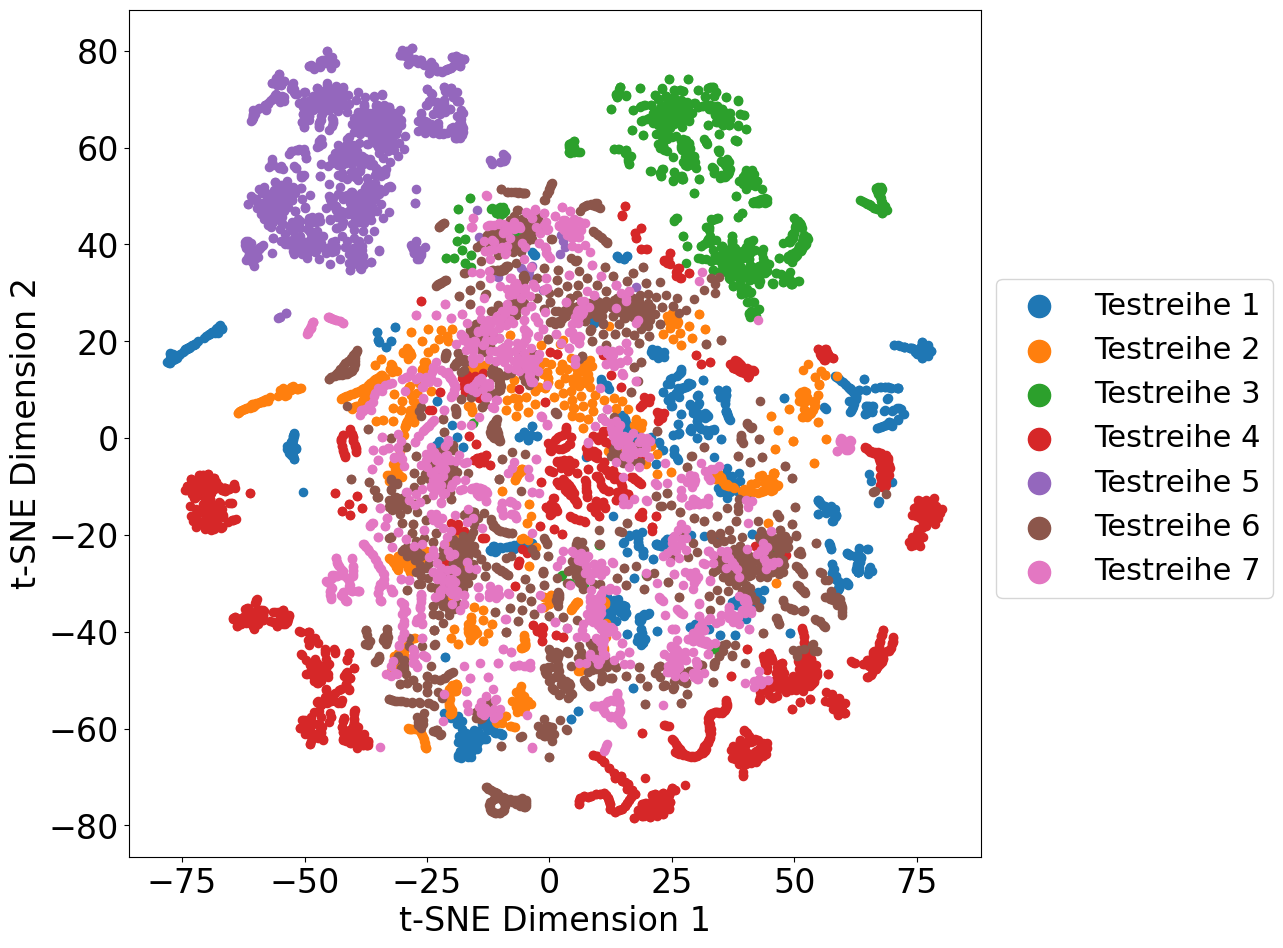

In [82]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(11, 11))

# Plotting the embedding of the cutouts in a scatter plot sorted by the classes of weld seams (see excel file "parameter" in the repo)
plt.scatter(embedding[:cutouts_index_upper_bound_class_1, 0], embedding[:cutouts_index_upper_bound_class_1, 1], s=35, label='Testreihe 1')                                                                           # Class 1: blue
plt.scatter(embedding[cutouts_index_upper_bound_class_empty:cutouts_index_upper_bound_class_2, 0], embedding[cutouts_index_upper_bound_class_empty:cutouts_index_upper_bound_class_2, 1], s=35, label='Testreihe 2')  # Class 2: orange
plt.scatter(embedding[cutouts_index_upper_bound_class_2:cutouts_index_upper_bound_class_3, 0], embedding[cutouts_index_upper_bound_class_2:cutouts_index_upper_bound_class_3, 1], s=35, label='Testreihe 3')          # Class 3: green
plt.scatter(embedding[cutouts_index_upper_bound_class_3:cutouts_index_upper_bound_class_4, 0], embedding[cutouts_index_upper_bound_class_3:cutouts_index_upper_bound_class_4, 1], s=35, label='Testreihe 4')          # Class 4: red
plt.scatter(embedding[cutouts_index_upper_bound_class_4:cutouts_index_upper_bound_class_5, 0], embedding[cutouts_index_upper_bound_class_4:cutouts_index_upper_bound_class_5, 1], s=35, label='Testreihe 5')          # Class 5: purple
plt.scatter(embedding[cutouts_index_upper_bound_class_5:cutouts_index_upper_bound_class_6, 0], embedding[cutouts_index_upper_bound_class_5:cutouts_index_upper_bound_class_6, 1], s=35, label='Testreihe 6')          # Class 6: brown
plt.scatter(embedding[cutouts_index_upper_bound_class_6:cutouts_index_upper_bound_class_7, 0], embedding[cutouts_index_upper_bound_class_6:cutouts_index_upper_bound_class_7, 1], s=35, label='Testreihe 7')          # Class 7: pink

# Change the size of the ticks on both axes
plt.tick_params(axis='both', which='major', labelsize=24)
# Add a x- and y-axis label to the plot
plt.xlabel('t-SNE Dimension 1', fontsize = 24)
plt.ylabel('t-SNE Dimension 2', fontsize = 24)
# Add a legend right next to the plot
plt.legend(fontsize=22, loc='upper left', bbox_to_anchor=(1, 0.7), markerscale=2.7)
# Add a title to the plot
#plt.title("t-SNE Embedding der Cutouts der 7 Testreihen", fontsize = 30)
# Save the plot as a png file
plt.savefig('t-SNE_cutoutlevel_parametergroups.png', dpi=600)
plt.show()

embeddings_class_1: (950, 2)


[]

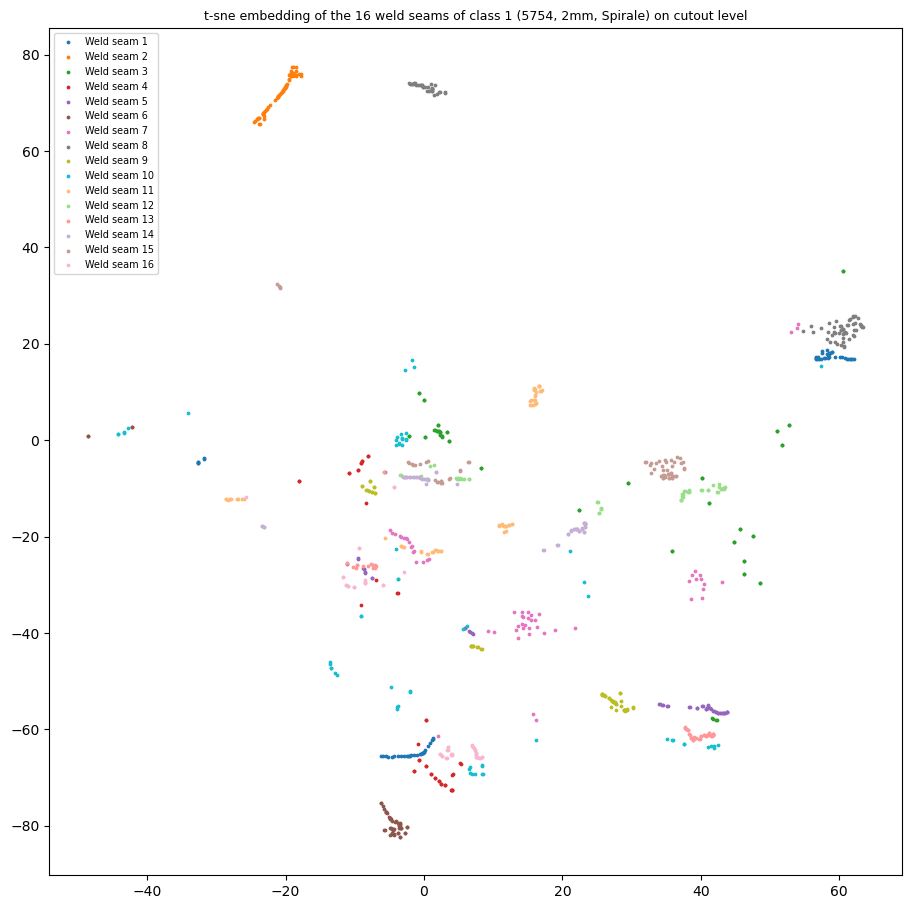

In [8]:
# Plot the embeddings of the weld seams of class 1 (each weld seams is represented by its own color)
embeddings_class_1 = embedding[:cutouts_index_upper_bound_class_1, :]
print("embeddings_class_1:", embeddings_class_1.shape)

# create a list of visually distinct colors for each ratio
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2']

# Number of weld seams of you want to display
number_of_displayed_weld_seams = 16

i = 0
cutouts_index_upper_bound_old = 0

# loop over all cutouts of all the weld seams of class 1
for weld_seam in cutouts_list_class_1:
    if i == 0:
        cutouts_index_upper_bound = cutouts_list_class_1[i]
    else:
        cutouts_index_upper_bound = cutouts_index_upper_bound_old + cutouts_list_class_1[i]
    i += 1
    # plot the embedding of the cutouts of the current weld seam
    plt.scatter(embedding[cutouts_index_upper_bound_old:cutouts_index_upper_bound, 0], embedding[cutouts_index_upper_bound_old:cutouts_index_upper_bound, 1], s=3, label='Weld seam ' + str(i), color = colors[i-1])
    cutouts_index_upper_bound_old = cutouts_index_upper_bound
    # break if number of desired weld seams is reached
    if i == number_of_displayed_weld_seams:
        break
    
plt.legend(fontsize = 7)
plt.title("t-sne embedding of the 16 weld seams of class 1 (5754, 2mm, Spirale) on cutout level", fontsize = 9)
plt.savefig('t-SNE_cutoutlevel_parameterclass1.png', dpi=600)
plt.plot()